In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

#Cores = {'Água':'k', 'Glicerina':'r', 'Sacarose':'b', 'Ureia':'g', '1,3BD':'magenta', 'DMSO':'purple'}
Cores = {'Água':'k', 'Glicerina':'#e67300', 'Sacarose':'#00b300', 
         'Ureia':'#ff0000', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 10

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
dados_ME = pd.read_csv(r'./dados experimentais/cmc_ttab/CMC_DH.csv',
                       sep=';', decimal=',')
X = dados_ME[['Índice de refração', 'Cte dielétrica', 'Param Gordon']]
Y1 = dados_ME['cmc/mM']
Y2 = dados_ME['DeltaH/kJ.mol-1']
dados_ME

,Composto,Concentração (% m/m),cmc/mM,DeltaH/kJ.mol-1,Índice de refração,Viscosidade,Cte dielétrica,Param Gordon
0,Água,0,3.980465,-4.331863,1.33250,1.002000,80.200000,2.726480
1,Glicerina,5,3.952720,-7.593361,1.33880,1.127000,78.960000,2.749596
2,Glicerina,10,3.792220,-7.739862,1.34481,1.310000,77.550000,2.704220
3,Glicerina,20,3.996950,-12.616962,1.35749,1.760000,74.720000,2.605320
4,Glicerina,30,4.387000,-15.175343,1.37070,2.500000,71.770000,2.506420
5,Glicerina,40,4.934010,-17.052040,1.38413,3.720000,68.760000,2.407520
6,Glicerina,50,6.212160,-21.810468,1.39809,6.000000,65.630000,2.308620
7,Glicerina,60,7.907820,-18.449047,1.41299,10.800000,62.030000,2.209720
8,Sacarose,5,3.646240,-6.085643,1.34030,1.146000,79.210000,2.768773
9,Sacarose,10,3.733890,-6.828784,1.34780,1.336000,78.040000,2.765195


# PLS sem alterar dados
## cmc

Text(0.5, 1.0, 'R2=0.74, mse=0.99')

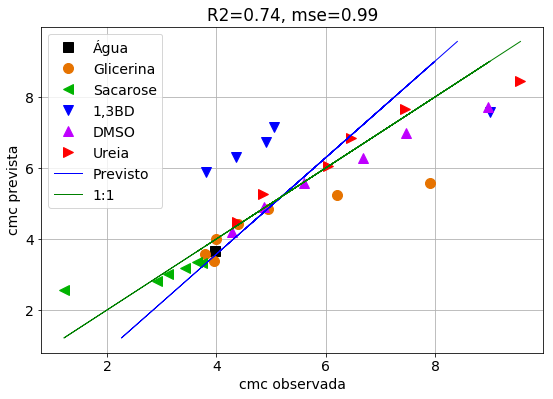

In [54]:
pls = PLSRegression(n_components=2)
pls.fit(X, Y1)
Y_pred = pls.predict(X)
score = r2_score(Y1, Y_pred)
mse = mean_squared_error(Y1, Y_pred)
z = np.polyfit(Y1, Y_pred, 1)

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y1[mascara], Y_pred[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
ax.plot(z[1]+z[0]*Y1, Y1, c='blue', linewidth=1, label='Previsto')
ax.plot(Y1, Y1, color='green', linewidth=1, label='1:1')
ax.set(xlabel='cmc observada', ylabel='cmc prevista')
ax.legend()
ax.grid()
ax.set_title(rf'R2={score:.2f}, mse={mse:.2f}')

## $\Delta$H

Text(0.5, 1.0, 'R2=0.82, mse=7.47')

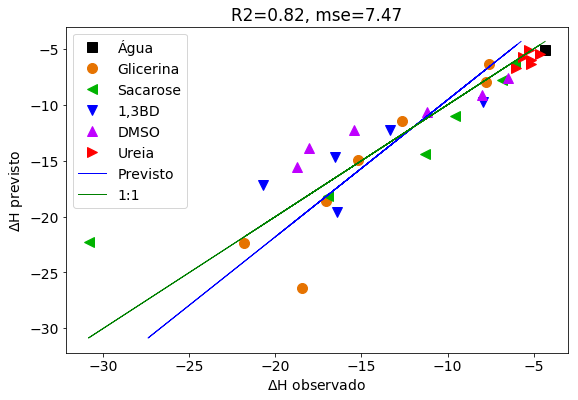

In [55]:
pls = PLSRegression(n_components=2)
pls.fit(X, Y2)
Y_pred = pls.predict(X)
score = r2_score(Y2, Y_pred)
mse = mean_squared_error(Y2, Y_pred)
z = np.polyfit(Y2, Y_pred, 1)

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y2[mascara], Y_pred[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
ax.plot(z[1]+z[0]*Y2, Y2, c='blue', linewidth=1, label='Previsto')
ax.plot(Y2, Y2, color='green', linewidth=1, label='1:1')
ax.set(xlabel='$\Delta$H observado', ylabel='$\Delta$H previsto')
ax.legend()
ax.set_title(rf'R2={score:.2f}, mse={mse:.2f}')

# PLS fazendo autoescalamento

Text(0.5, 1.0, 'R2=0.76, mse=0.23')

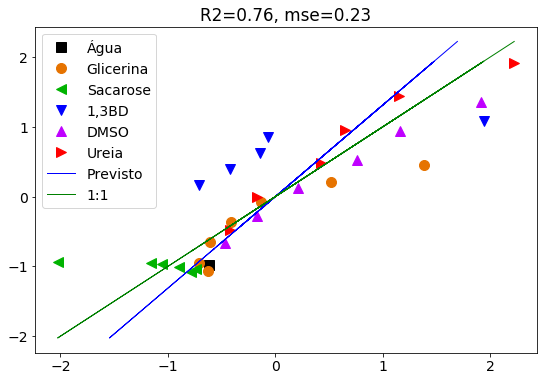

In [56]:
pls = PLSRegression(n_components=3)
X_AS = (X - X.mean()) / X.std()
Y1_AS = (Y1 - Y1.mean()) / Y1.std()

pls.fit(X_AS, Y1_AS)
Y_pred = pls.predict(X_AS)
score = r2_score(Y1_AS, Y_pred)
mse = mean_squared_error(Y1_AS, Y_pred)
z = np.polyfit(Y1_AS, Y_pred, 1)

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y1_AS[mascara], Y_pred[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
ax.plot(z[1]+z[0]*Y1_AS, Y1_AS, c='blue', linewidth=1, label='Previsto')
ax.plot(Y1_AS, Y1_AS, color='green', linewidth=1, label='1:1')

ax.legend()
ax.set_title(rf'R2={score:.2f}, mse={mse:.2f}')

Text(0.5, 1.0, 'R2=0.82, mse=0.18')

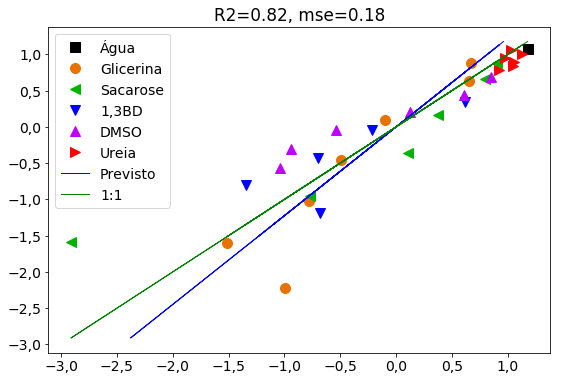

In [57]:
pls = PLSRegression(n_components=3)
X_AS = (X - X.mean()) / X.std()
Y2_AS = (Y2 - Y2.mean()) / Y2.std()

pls.fit(X_AS, Y2_AS)
Y_pred = pls.predict(X_AS)
score = r2_score(Y2_AS, Y_pred)
mse = mean_squared_error(Y2_AS, Y_pred)
z = np.polyfit(Y2_AS, Y_pred, 1)

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y2_AS[mascara], Y_pred[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
ax.plot(z[1]+z[0]*Y2_AS, Y2_AS, c='blue', linewidth=1, label='Previsto')
ax.plot(Y2_AS, Y2_AS, color='green', linewidth=1, label='1:1')

ax.legend()
ax.set_title(rf'R2={score:.2f}, mse={mse:.2f}')

# Utilizando Statsmodels

In [67]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

c:\users\karl\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## CMC

In [91]:
results = sm.OLS(Y1, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cmc/mM   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     196.4
Date:                seg, 29 out 2018   Prob (F-statistic):           6.64e-19
Time:                        18:04:11   Log-Likelihood:                -49.106
No. Observations:                  31   AIC:                             104.2
Df Residuals:                      28   BIC:                             108.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Índice de refração     6.7749      1.800      3.765      0.001       3.089      10.461
Cte dielétrica         0.1689      0.033      5.138      0.000       0.102       0.236
Param Gordon          -6.7343      1.030     -6.536      0.000      -8.845      -4.624
==============================================================================
Omnibus:                        1.549   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                0.543
Skew:                          -0.142   Prob(JB):                        0.762
Kurtosis:                       3.583   Cond. No.                         653.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
results.params

Índice de refração    6.774866
Cte dielétrica        0.168858
Param Gordon         -6.734317
dtype: float64

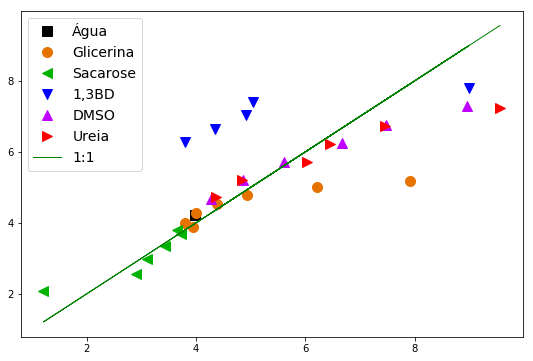

In [90]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2])

Y_modelo = results.params[0] * X.iloc[:,0] + results.params[1] * X.iloc[:,1] + results.params[2] * X.iloc[:,2]

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y1[mascara], Y_modelo[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
#ax.plot(Y1, Y_modelo, c='blue', linewidth=1, label='Previsto')
ax.plot(Y1, Y1, color='green', linewidth=1, label='1:1')

ax.legend()

## $\Delta$H

In [92]:
results = sm.OLS(Y2, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DeltaH/kJ.mol-1   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     155.7
Date:                seg, 29 out 2018   Prob (F-statistic):           1.44e-17
Time:                        18:04:22   Log-Likelihood:                -80.291
No. Observations:                  31   AIC:                             166.6
Df Residuals:                      28   BIC:                             170.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Índice de refração   -50.0321      4.921    -10.168      0.000     -60.112     -39.952
Cte dielétrica         0.5438      0.090      6.052      0.000       0.360       0.728
Param Gordon           5.7768      2.817      2.050      0.050       0.006      11.548
==============================================================================
Omnibus:                       17.860   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.310
Skew:                          -1.390   Prob(JB):                     3.19e-06
Kurtosis:                       6.445   Cond. No.                         653.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
results.params

Índice de refração   -50.032110
Cte dielétrica         0.543843
Param Gordon           5.776780
dtype: float64

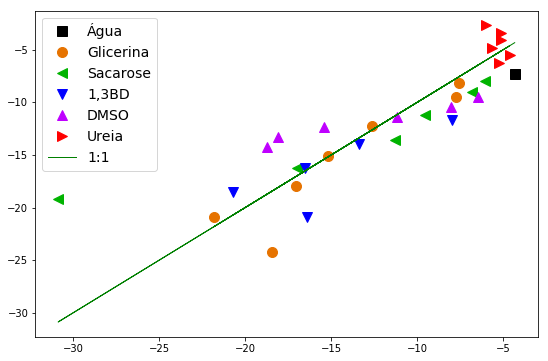

In [94]:
%matplotlib inline

Y_modelo = results.params[0] * X.iloc[:,0] + results.params[1] * X.iloc[:,1] + results.params[2] * X.iloc[:,2]

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y2[mascara], Y_modelo[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)

#ax.plot(Y1, Y_modelo, c='blue', linewidth=1, label='Previsto')
ax.plot(Y2, Y2, color='green', linewidth=1, label='1:1')

ax.legend()


## CMC_AS

In [95]:
results = sm.OLS(Y1_AS, X_AS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cmc/mM   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     29.91
Date:                seg, 29 out 2018   Prob (F-statistic):           7.09e-09
Time:                        18:07:13   Log-Likelihood:                -21.219
No. Observations:                  31   AIC:                             48.44
Df Residuals:                      28   BIC:                             52.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Índice de refração     0.4976      0.107      4.664      0.000       0.279       0.716
Cte dielétrica         0.9196      0.122      7.561      0.000       0.670       1.169
Param Gordon          -0.9173      0.107     -8.550      0.000      -1.137      -0.698
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.497
Skew:                          -0.538   Prob(JB):                        0.473
Kurtosis:                       3.020   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

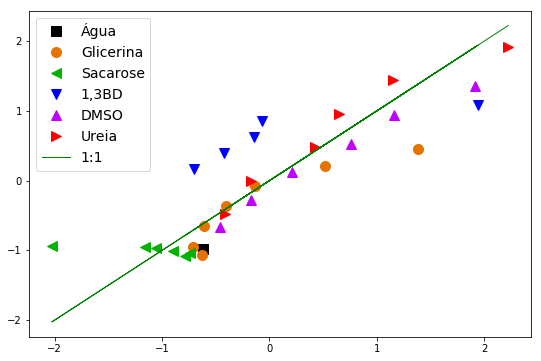

In [96]:
Y_modelo = results.params[0] * X_AS.iloc[:,0] + results.params[1] * X_AS.iloc[:,1] + results.params[2] * X_AS.iloc[:,2]

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y1_AS[mascara], Y_modelo[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
#ax.plot(Y1_AS, Y_modelo, c='blue', linewidth=1, label='Previsto')
ax.plot(Y1_AS, Y1_AS, color='green', linewidth=1, label='1:1')

ax.legend()

## $\Delta$H_AS

In [97]:
results = sm.OLS(Y2_AS, X_AS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DeltaH/kJ.mol-1   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     41.65
Date:                seg, 29 out 2018   Prob (F-statistic):           1.87e-10
Time:                        18:08:50   Log-Likelihood:                -17.161
No. Observations:                  31   AIC:                             40.32
Df Residuals:                      28   BIC:                             44.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Índice de refração    -0.4803      0.094     -5.132      0.000      -0.672      -0.289
Cte dielétrica         0.4325      0.107      4.053      0.000       0.214       0.651
Param Gordon           0.2589      0.094      2.751      0.010       0.066       0.452
==============================================================================
Omnibus:                        8.302   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               12.396
Skew:                          -0.371   Prob(JB):                      0.00203
Kurtosis:                       6.008   Cond. No.                         2.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

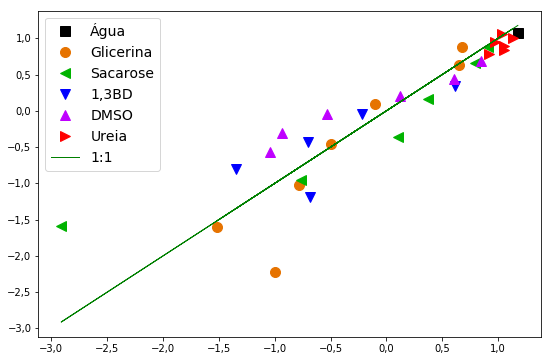

In [98]:
Y_modelo = results.params[0] * X_AS.iloc[:,0] + results.params[1] * X_AS.iloc[:,1] + results.params[2] * X_AS.iloc[:,2]

fig, ax = plt.subplots(1, 1, figsize=(9,6))
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

for comp in dados_ME['Composto'].unique():
    mascara = dados_ME['Composto'] == comp
    ax.plot(Y2_AS[mascara], Y_modelo[mascara], color=Cores[comp], linewidth=0, marker=Simbolos[comp],
            markersize=def_markersize, label=comp)
    
#ax.plot(Y2_AS, Y_modelo, c='blue', linewidth=1, label='Previsto')
ax.plot(Y2_AS, Y2_AS, color='green', linewidth=1, label='1:1')

ax.legend()